In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets


from networks import ResNet18Reduced



resnet_features = ResNet18Reduced()
resnet_features.load_state_dict(torch.load('weights/resnet18reduced.pth'))


normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
train_loader = torch.utils.data.DataLoader(
    datasets.ImageFolder('images', transforms.Compose([
        transforms.RandomSizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize,
    ])),
    batch_size=1, shuffle=True,
    num_workers=1, pin_memory=True)
    
for a,b in train_loader:
    break


/home/yiyuezhuo/anaconda3/lib/python3.7/site-packages/torchvision/transforms/transforms.py:562: UserWarning: The use of the transforms.RandomSizedCrop transform is deprecated, please use transforms.RandomResizedCrop instead.
  warnings.warn("The use of the transforms.RandomSizedCrop transform is deprecated, " +


In [2]:
resnet_features.train();


In [3]:
ag = a.clone().detach().requires_grad_(True)
x2,x3 = resnet_features(ag)
#torch.abs(x3).sum(0).sum(0)[i,j].backward()
x3.sum(0).sum(0)[7,7].backward()
g = torch.abs(ag.grad).sum(0).sum(0).detach().numpy()

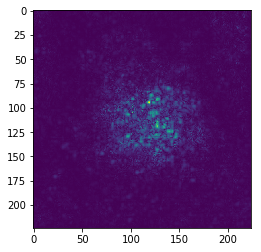

In [4]:
plt.imshow(g)

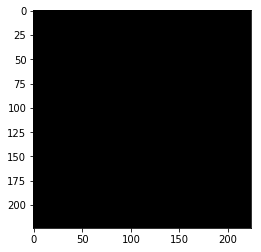

In [5]:
plt.imshow(g==0,cmap='gray')

In [6]:
ag = a.clone().detach().requires_grad_(True)
x2,x3 = resnet_features(ag)
#torch.abs(x3).sum(0).sum(0)[i,j].backward()
x2.sum(0).sum(0)[14,14].backward()
g = torch.abs(ag.grad).sum(0).sum(0).detach().numpy()

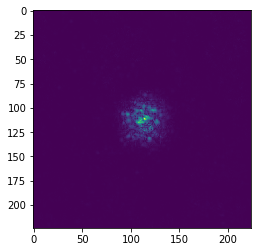

In [7]:
plt.imshow(g)

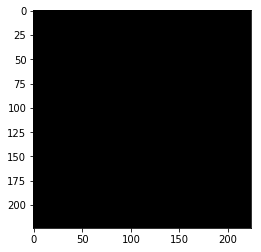

In [8]:
plt.imshow(g==0,cmap='gray')

In [9]:
resnet_features.train()

ag = a.clone().detach().requires_grad_(True)
x2,x3 = resnet_features(ag)
#torch.abs(x3).sum(0).sum(0)[i,j].backward()
x2.sum(0).sum(0)[14,14].backward()
g = torch.abs(ag.grad).sum(0).sum(0).detach().numpy()

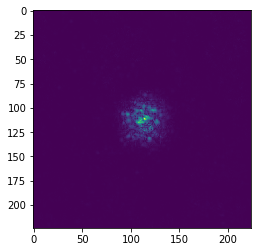

In [10]:
plt.imshow(g)

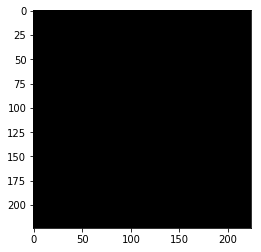

In [11]:
plt.imshow(g==0,cmap='gray')

这是因为train模式下batchnorm的一个cell的结果和与整个图上的cell有关。

In [12]:
train_loader = torch.utils.data.DataLoader(
    datasets.ImageFolder('images', transforms.Compose([
        transforms.RandomSizedCrop(448),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize,
    ])),
    batch_size=1, shuffle=True,
    num_workers=1, pin_memory=True)
    
for a,b in train_loader:
    break


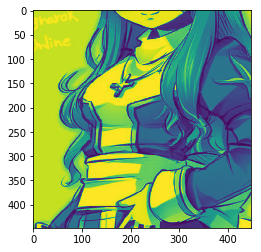

In [13]:
plt.imshow(a.sum(0).mean(0))

In [14]:
resnet_features.eval();


In [15]:
ag = a.clone().detach().requires_grad_(True)
x2,x3 = resnet_features(ag)
#torch.abs(x3).sum(0).sum(0)[i,j].backward()
#x4.sum(0).sum(0)[14,14].backward()
#g = torch.abs(ag.grad).sum(0).sum(0).detach().numpy()

In [16]:
ag = a.clone().detach().requires_grad_(True)
x2,x3 = resnet_features(ag)
x3.shape

torch.Size([1, 256, 28, 28])

In [17]:
x3.sum(0).sum(0)[14,14].backward()

In [18]:
g = torch.abs(ag.grad).sum(0).sum(0).detach().numpy()

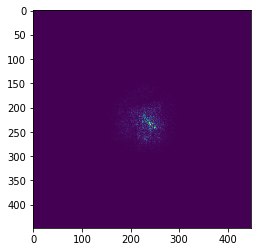

In [19]:
plt.imshow(g)

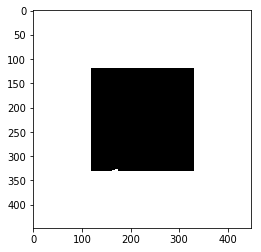

In [20]:
plt.imshow(g==0,cmap='gray')

In [21]:
ag = a.clone().detach().requires_grad_(True)
x2,x3 = resnet_features(ag)
x2.shape

torch.Size([1, 128, 56, 56])

In [22]:
x2.sum(0).sum(0)[28,28].backward()

In [23]:
g = torch.abs(ag.grad).sum(0).sum(0).detach().numpy()

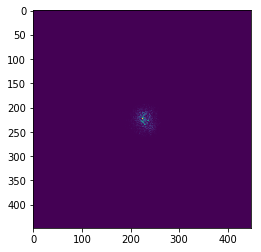

In [24]:
plt.imshow(g)

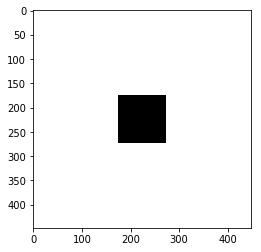

In [25]:
plt.imshow(g==0,cmap='gray')

In [26]:
train_loader = torch.utils.data.DataLoader(
    datasets.ImageFolder('images', transforms.Compose([
        transforms.RandomSizedCrop(400),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize,
    ])),
    batch_size=1, shuffle=True,
    num_workers=1, pin_memory=True)
    
for a,b in train_loader:
    break


In [27]:
ag = a.clone().detach().requires_grad_(True)
x2,x3 = resnet_features(ag)
x3.shape

torch.Size([1, 256, 25, 25])

In [28]:
x3.sum(0).sum(0)[12,12].backward()

In [29]:
g = torch.abs(ag.grad).sum(0).sum(0).detach().numpy()

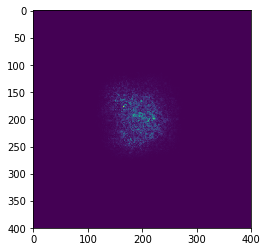

In [30]:
plt.imshow(g)

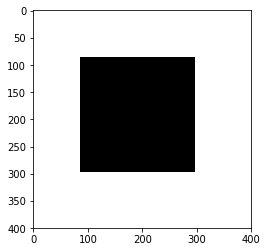

In [31]:
plt.imshow(g==0,cmap='gray')

In [32]:
ag = a.clone().detach().requires_grad_(True)
x2,x3 = resnet_features(ag)
x2.shape

torch.Size([1, 128, 50, 50])

In [33]:
x2.sum(0).sum(0)[25,25].backward()

In [34]:
g = torch.abs(ag.grad).sum(0).sum(0).detach().numpy()

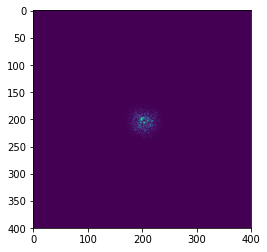

In [35]:
plt.imshow(g)

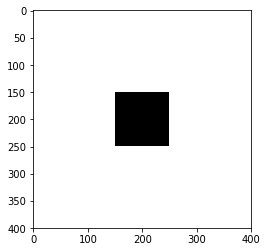

In [36]:
plt.imshow(g==0,cmap='gray')

Why you are always fail in windows...

In [37]:
from itertools import product

In [38]:
f = x2.shape[2]
f

50

In [69]:
dd = []

for i in range(f):
    ag = a.clone().detach().requires_grad_(True)
    x2,x3 = resnet_features(ag)
    x2.sum(0).sum(0)[i,i].backward()
    
    d = torch.abs(ag.grad[0]).sum(0)
    dx = d.sum(0).nonzero().squeeze()
    dy = d.sum(1).nonzero().squeeze()
    
    dd.append([dx.min(),dy.min(),dx.max(),dy.max()])

In [70]:
dd[0]

[tensor(0), tensor(0), tensor(49), tensor(49)]

In [71]:
import matplotlib.patches as patches

def rectangle(ax, xy, width, height, edgecolor='r'):
    rect = patches.Rectangle(xy, width, height, linewidth=1, edgecolor=edgecolor, facecolor='none')
    ax.add_patch(rect)


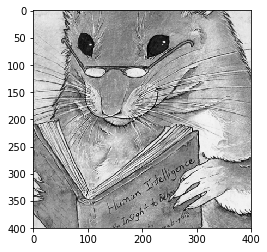

In [72]:
plt.imshow(a.sum(0).sum(0),cmap='gray')


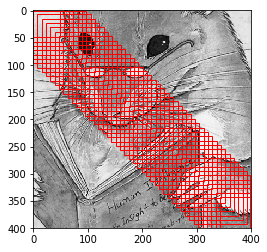

In [73]:
plt.imshow(a.sum(0).sum(0),cmap='gray')
for i in range(0,f):
    rectangle(plt.gca(), [dd[i][0],dd[i][1]], dd[i][2]-dd[i][0], dd[i][3]-dd[i][1])


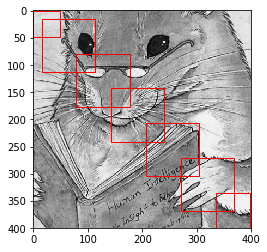

In [74]:
plt.imshow(a.sum(0).sum(0),cmap='gray')
for i in range(0,f,8):
    rectangle(plt.gca(), [dd[i][0],dd[i][1]], dd[i][2]-dd[i][0], dd[i][3]-dd[i][1])


In [75]:
cd = dd[len(dd)//2]
w,h  = cd[2] - cd[0],cd[3] - cd[1]
w,h

(tensor(98), tensor(98))

In [76]:
w.float()/400,h.float()/400

(tensor(0.2450), tensor(0.2450))

So we can just use the 

$$
(\frac{i+0.5}{f_k}, \frac{j+0.5}{f_k})
$$

to compute the "center" of anchor/default box? Is there any setting may resulting in a complex structure we can not get the center like this.

In [53]:
dd = []

for i in range(x3.shape[2]):
    ag = a.clone().detach().requires_grad_(True)
    x2,x3 = resnet_features(ag)
    x3.sum(0).sum(0)[i,i].backward()
    
    d = torch.abs(ag.grad[0]).sum(0)
    dx = d.sum(0).nonzero().squeeze()
    dy = d.sum(1).nonzero().squeeze()
    
    dd.append([dx.min(),dy.min(),dx.max(),dy.max()])

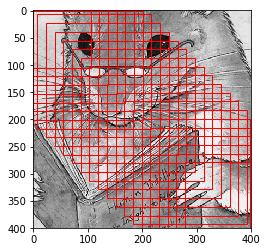

In [54]:
plt.imshow(a.sum(0).sum(0),cmap='gray')
for i in range(0,x3.shape[2]):
    rectangle(plt.gca(), [dd[i][0],dd[i][1]], dd[i][2]-dd[i][0], dd[i][3]-dd[i][1])


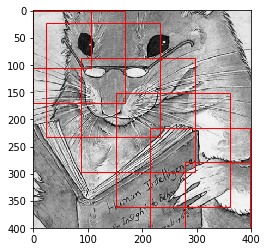

In [63]:
plt.imshow(a.sum(0).sum(0),cmap='gray')
for i in range(0,x3.shape[2],4):
    rectangle(plt.gca(), [dd[i][0],dd[i][1]], dd[i][2]-dd[i][0], dd[i][3]-dd[i][1])


In [65]:
cd = dd[len(dd)//2]
w,h  = cd[2] - cd[0],cd[3] - cd[1]
w,h

(tensor(210), tensor(210))

In [68]:
w.float()/400,h.float()/400

(tensor(0.5250), tensor(0.5250))